<a href="https://colab.research.google.com/github/humairoh22/Analysis-Hotel-Reservation/blob/main/Analysis_Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**

Canceled reservations are the most common problem often encountered in hotel industry. Many customers cancel their reservations due to reasons such as altered schedules or plans. This is often facilitated by free or low-cost cancellation options, which is beneficial to customers but can be problematic for hotels because it may result in lower revenue.

Analyzing what factors led a customer to cancel their reservation is essential in order to get insight and minimize customer cancellation rates.


**Information Details**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Load data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA/Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no null values in the dataset

In [ ]:
#Let's check unique values in categorial columns
print(data['type_of_meal_plan'].unique())
print(data['room_type_reserved'].unique())
print(data['market_segment_type'].unique())
print(data['booking_status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Not_Canceled' 'Canceled']


In [ ]:
#replace values in column type of meal plane properly

data['room_type_reserved'] = data['room_type_reserved'].replace({'Room_Type 1':'type 1',
                                                            'Room_Type 2':'type 2',
                                                            'Room_Type 3':'type 3',
                                                            'Room_Type 4':'type 4',
                                                            'Room_Type 5':'type 5',
                                                            'Room_Type 6':'type 6',
                                                            'Room_Type 7':'type 7'})
data['booking_status'] = data['booking_status'].replace({'Not_Canceled':'Not canceled',
                                                         'Canceled':'Canceled'})
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not canceled
1,INN00002,2,0,2,3,Not Selected,0,type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**EXPLORATORY DATA ANALYSIS**

In [ ]:
color =['#6f1d1b', '#e09f3e', '#bb9457','#fff3b0','#432818', '#99582a', '#9e2a2b']
sns.set_theme(style='darkgrid', palette=color)

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

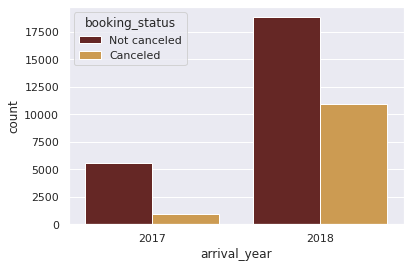

In [ ]:
sns.countplot(data=data, x='arrival_year', hue='booking_status')

Text(0.5, 1.0, 'Total booking by month in 2018')

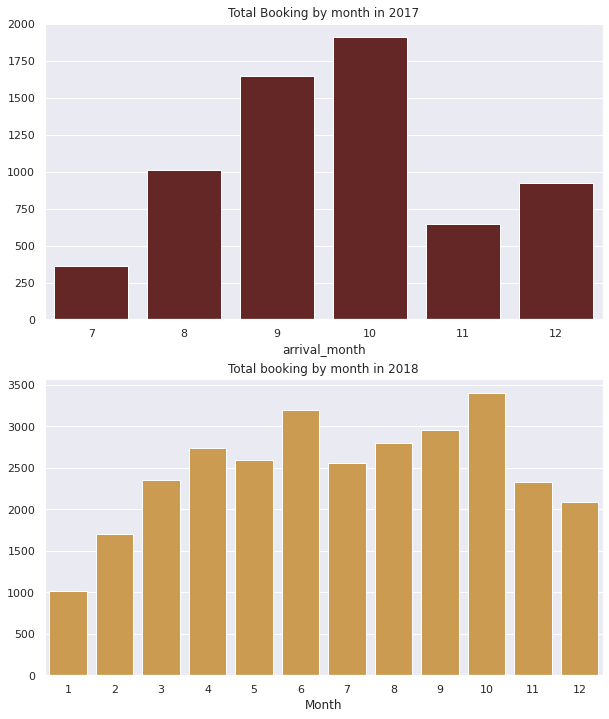

In [ ]:
visitor_by_month = data.groupby(['arrival_year', 'arrival_month'])['Booking_ID'].agg('count').reset_index()

plt.figure(figsize=(10, 12))
plt.subplot(2,1,1)
fig1 = sns.barplot(x='arrival_month', y='Booking_ID', data=visitor_by_month[visitor_by_month['arrival_year']==2017], color='#6f1d1b')
plt.ylabel("")
plt.title("Total Booking by month in 2017")

plt.subplot(2,1,2)
fig2 = sns.barplot(x='arrival_month', y='Booking_ID', data=visitor_by_month[visitor_by_month['arrival_year']==2018], color='#e09f3e')
plt.ylabel("")
plt.xlabel("Month")
plt.title("Total booking by month in 2018")


Insight:

The graph shows that total bookings are increasing month by month, with October having the highest total bookings.

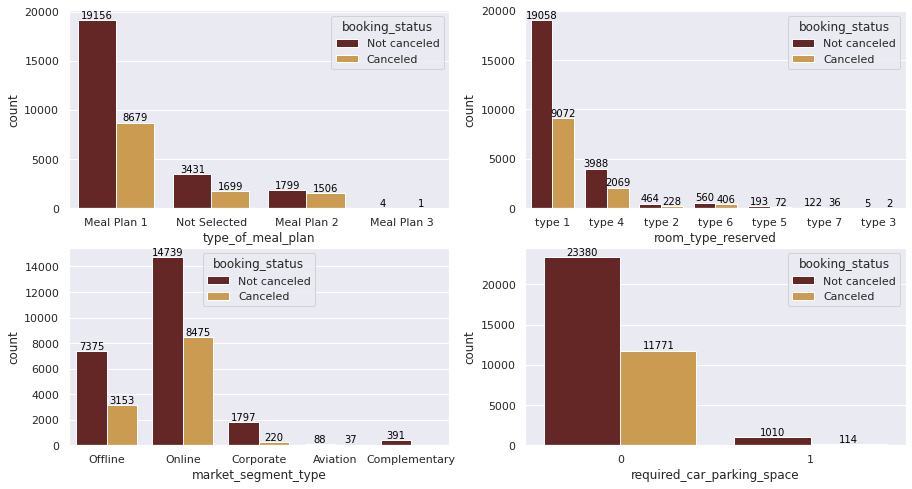

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

cat_col = {'type_of_meal_plan':ax1,
           'room_type_reserved':ax2,
           'market_segment_type':ax3,
           'required_car_parking_space':ax4
           }


for key, value in cat_col.items():
  fig = sns.countplot(data=data, x=key, hue='booking_status', ax=value)
  
  for i in  fig.patches:
    fig.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')


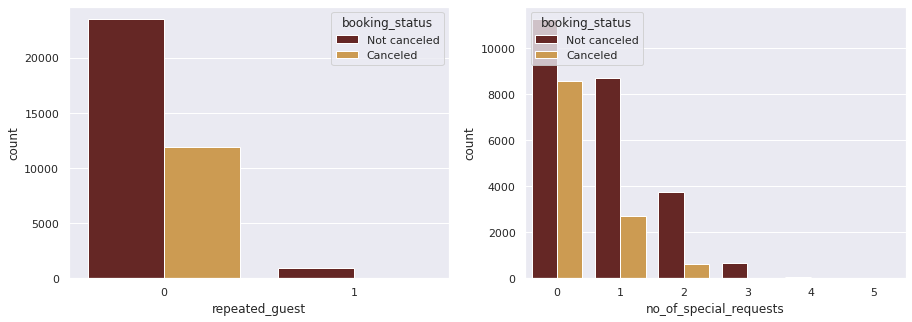

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

col = {'repeated_guest':ax1,
       'no_of_special_requests':ax2}

for key, value in col.items():
  sns.countplot(data=data, x=key, hue='booking_status', ax=value)



Insight:

* From the graphs, most guests (both canceled and not canceled) booking a room by online for reservations. They prefer to book type 1 as their room, plan 1 for the meals, and didn't require parking space for the car.

* Many guests made reservation for the first time at this hotel. Guests who have previously booked a room are less likely to cancel their next reservation.

* It looks like reservation cancellations are decreasing as the number of special requests by guests increases.


Analysis guests

'\nfor i in  a.patches:\n  a.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),\n             ha=\'center\', va=\'center\', fontsize=10, color=\'black\', xytext=(0, 5),\n            textcoords=\'offset points\')\n'

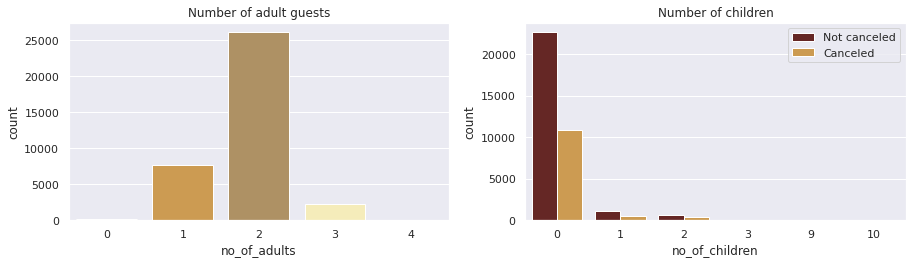

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.countplot(data=data, x='no_of_adults')
plt.title('Number of adult guests')


plt.subplot(2,2,2)
sns.countplot(data=data, x='no_of_children', hue='booking_status')
plt.title('Number of children')
plt.legend(loc=1, bbox_to_anchor=(1,1))

"""
for i in  a.patches:
  a.annotate("%.0f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
             ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
            textcoords='offset points')
"""

Text(0.5, 1.0, 'Number of guests that bring children')

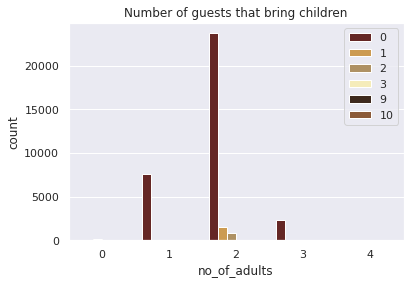

In [ ]:
sns.countplot(data=data, x='no_of_adults', hue='no_of_children')
plt.legend(loc=1, bbox_to_anchor=(1,1))
plt.title('Number of guests that bring children')

Insight:

* Most guests reserved a room for 2 adults without children. 
* Guests who bring children don't have any significant impact on canceling reservations.

In [ ]:
data['total_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

Text(0.5, 0, 'Total day')

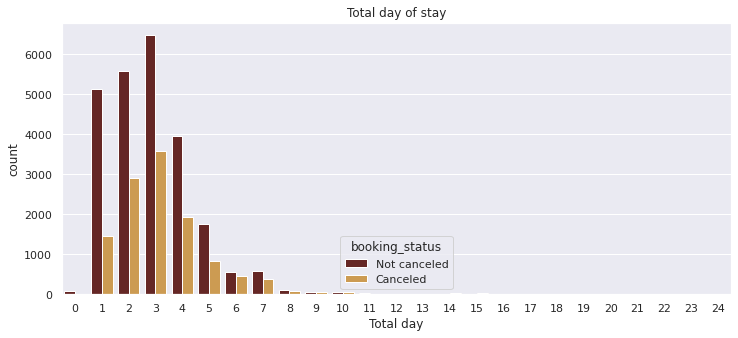

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='total_stay', hue='booking_status')
plt.title("Total day of stay")
plt.xlabel("Total day")

Most customers booking a room for 3 days. Only few guest that stay in the hotel for more than 10 days.

Analysis lead time & average price per room

<AxesSubplot:xlabel='booking_status', ylabel='lead_time'>

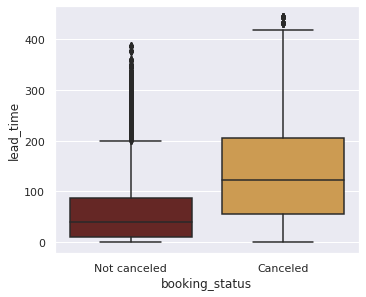

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='booking_status', y='lead_time', data=data)

Insight:

According to the graph, customers are less likely to cancel their reservation when the day range between the booking date and the arrival date is not too far away. The longer the lead time, the probability customers cancel the reservation increase.

<AxesSubplot:xlabel='avg_price_per_room', ylabel='lead_time'>

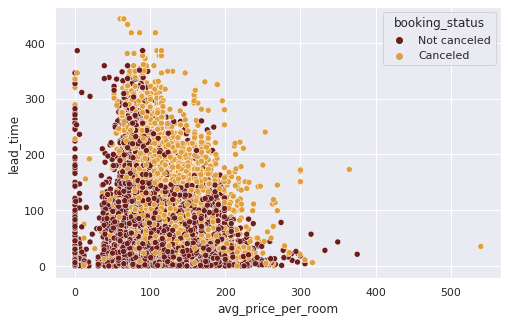

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='avg_price_per_room', y='lead_time', hue='booking_status', data=data)


In [ ]:
a = data[(data['avg_price_per_room'] >= 90) & (data['avg_price_per_room'] <= 200)]
b = a['booking_status'].value_counts()      

In [ ]:
print("The percentage of cancellation with the price between 90 and 200: ", b['Canceled'] / (b['Not canceled'] + b['Canceled']) * 100)

The percentage of cancellation with the price between 90 and 200:  38.292596528515766


Insight:

From the graph, it Looks like people tend to cancel more reservations when the average price of the room is between 90 and 200 or around 38.3% of the total number of bookings.

**PREPOCESSING**

In [ ]:
#drop column that  unnecessary

data.drop(columns=['Booking_ID'], inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_stay
0,2,0,1,2,Meal Plan 1,0,type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not canceled,3
1,2,0,2,3,Not Selected,0,type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not canceled,5
2,1,0,2,1,Meal Plan 1,0,type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,2,0,0,2,Meal Plan 1,0,type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,2,0,1,1,Not Selected,0,type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


In [ ]:
#create encoding for categorial columns
le = LabelEncoder()

In [ ]:
print(data['type_of_meal_plan'].unique())
print(data['room_type_reserved'].unique())
print(data['market_segment_type'].unique())
print(data['booking_status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['type 1' 'type 4' 'type 2' 'type 6' 'type 5' 'type 7' 'type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Not canceled' 'Canceled']


In [ ]:
data['booking_status'] = le.fit_transform(data['booking_status'])
data['type_of_meal_plan'] = le.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = le.fit_transform(data['room_type_reserved'])
data['market_segment_type'] = le.fit_transform(data['market_segment_type'])

print(data['type_of_meal_plan'].unique())
print(data['room_type_reserved'].unique())
print(data['market_segment_type'].unique())
print(data['booking_status'].unique())

[0 3 1 2]
[0 3 1 5 4 6 2]
[3 4 2 0 1]
[1 0]


In [ ]:
X = data.drop(columns=['booking_status'], axis=1)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Using standard scaler to create same scale to all columns
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'total_stay']

In [ ]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

**BUILD MODEL**

In [ ]:
rfc = RandomForestClassifier(max_depth=30, n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [ ]:
y_pred = rfc.predict(X_test)

print("Accuracy score : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy score : 0.9022


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2930,  677],
       [ 387, 6889]])

Text(30.499999999999993, 0.5, 'Actual')

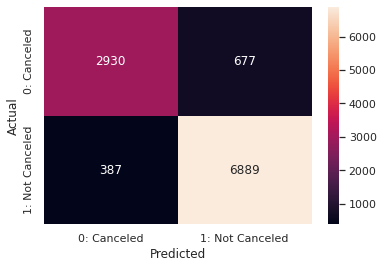

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["0: Canceled", "1: Not Canceled"],
            yticklabels=["0: Canceled", "1: Not Canceled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      3607
           1       0.91      0.95      0.93      7276

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



* The percentage model predict correctly is 90.2%
* Among all customers who are predicted wouldn't cancel the reservation, 91% are correctly classified.
* Among all customers that actually do not cancel reservations, 95% are correctly classified.


**Feature Importance**

<AxesSubplot:>

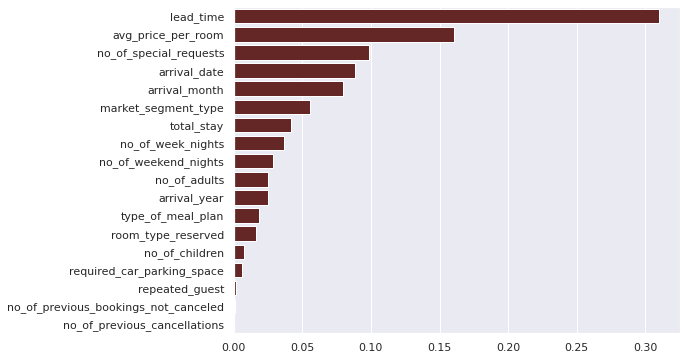

In [ ]:
feature_score = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_score, y=feature_score.index, color='#6f1d1b')

Insight:

The lead time is the most important feature in our data, followed by the average price per room and the number of special requests made by customers. It make senses with our EDA above that the top 3 of our feature have greatest impact for customers to cancel their reservations. 